***Preliminary data analysis***

In [1]:
import sys
sys.path.append('../Data_Feature')
sys.path.append('../Data_processing')
import numpy as np
import pandas as pd
from data_processing import KOProcessor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from matplotlib.patches import Patch
import matplotlib as mpl
from scipy.stats import pearsonr


In [2]:
# Initialize processor with dataset paths  
processor = KOProcessor(  
    terms_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/terms_KO.zip', #Absolute path was used due to bug in relative path
    terms_csv_path = 'terms_KO.csv',
    traits_reduced_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/reducedDataset.zip', #Absolute path was used due to bug in relative path
    traits_reduced_csv_path = 'reducedDataset.csv',
    traits_assembled_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/assembledDataset.zip', #Absolute path was used due to bug in relative path
    traits_assembled_csv_path = 'assembledDataset.csv' 
)  

# Load datasets from ZIP  
ko_terms = processor.load_terms()  # KO annotations  
reduced_traits = processor.load_reduced_traits_data()  # Primary traits  
assembled_traits = processor.load_assembled_traits_data()  # Supplemental traits  

# Display raw data structure  
print("KO Terms Columns:", ko_terms.columns.tolist())  
print("Reduced Traits Columns:", reduced_traits.columns.tolist())
print("Assembled Traits Columns:", assembled_traits.columns.tolist())
print("KO Terms Shape:", ko_terms.shape)
print("Reduced Traits Shape:", reduced_traits.shape)
print("Assembled Traits Shape:", assembled_traits.shape)
display(reduced_traits)  


Data loaded successfully:
   Unnamed: 0   key      KO
0           0  1000  K00001
1           1  1000  K13954
2           2  1000  K00003
3           3  1000  K00013
4           4  1000  K00014
Data loaded successfully:
   key        ID                      speciesStrain  \
0    1  592010.0   Abiotrophia defectiva ATCC 49176   
1    1     219.0     Abiotrophia defectiva DSM 9849   
2    2  159837.0       Abyssibacter profundi OUC007   
3    3       NaN  Acanthopleuribacter pedis FYK2218   
4    4  258515.0   Acetanaerobacterium elongatum Z7   

                 speciesStrainComp                genus            genusComp  \
0    abiotrophiadefectivaatcc49176          Abiotrophia          abiotrophia   
1      abiotrophiadefectivadsm9849          Abiotrophia          abiotrophia   
2       abyssibacterprofundiouc007         Abyssibacter         abyssibacter   
3  acanthopleuribacterpedisfyk2218  Acanthopleuribacter  acanthopleuribacter   
4   acetanaerobacteriumelongatumz7  Acetanaerobac

,key,ID,speciesStrain,speciesStrainComp,genus,genusComp,species,speciesComp,strain,cultureNo,typeStrain,misclassified,gram,oxygen,substrate,genomeAccNo,usedAccNo,ncbiFTP_FAA
0,1,592010.0,Abiotrophia defectiva ATCC 49176,abiotrophiadefectivaatcc49176,Abiotrophia,abiotrophia,Abiotrophia defectiva,abiotrophiadefectiva,ATCC 49176,NaN,NaN,NaN,positive,facultative,NaN,GCA_000160075|GCA_013267415|46125.34|46125.35|...,GCA_000160075,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
1,1,219.0,Abiotrophia defectiva DSM 9849,abiotrophiadefectivadsm9849,Abiotrophia,abiotrophia,Abiotrophia defectiva,abiotrophiadefectiva,DSM 9849,DSM 9849|ATCC 49176|CIP 103242|SC 10,yes,NaN,NaN,anaerobic,alpha-cyclodextrin|arginine|D-arabitol|D-manni...,GCA_000160075|GCA_013267415|46125.34|46125.35|...,GCA_000160075,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
2,2,159837.0,Abyssibacter profundi OUC007,abyssibacterprofundiouc007,Abyssibacter,abyssibacter,Abyssibacter profundi,abyssibacterprofundi,OUC007,KCTC 52933|MCCC 1K03450|JCM 32025,yes,NaN,NaN,aerobic,2-oxopentanoate|4-hydroxybutyrate|adipate|algi...,GCA_003151135|2831460164|QEQK00000000|2182787.3,GCA_003151135,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
3,3,NaN,Acanthopleuribacter pedis FYK2218,acanthopleuribacterpedisfyk2218,Acanthopleuribacter,acanthopleuribacter,Acanthopleuribacter pedis,acanthopleuribacterpedis,FYK2218,NaN,NaN,NaN,negative,aerobic,adipate|alanine|arginine|decanoate|D-glucose|D...,GCA_017377855|442870.4,GCA_017377855,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
4,4,258515.0,Acetanaerobacterium elongatum Z7,acetanaerobacteriumelongatumz7,Acetanaerobacterium,acetanaerobacterium,Acetanaerobacterium elongatum,acetanaerobacteriumelongatum,Z7,NaN,NaN,NaN,positive,anaerobic,arabinose|cellobiose|esculin|fructose|galactos...,258515.18|GCA_900103835|2667527408,GCA_900103835,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,3303,5729.0,Zeaxanthinibacter enoshimensis TD-ZE3,zeaxanthinibacterenoshimensistdze3,Zeaxanthinibacter,zeaxanthinibacter,Zeaxanthinibacter enoshimensis,zeaxanthinibacterenoshimensis,TD-ZE3,DSM 18435|CCUG 53613|NBRC 101990|CIP 109560,yes,NaN,NaN,aerobic,arabinose|cellobiose|esculin|gluconate|glucose...,GCA_004362865|392009.4|2731639225,GCA_004362865,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
3405,3304,159728.0,Zhengella mangrovi X9-2-2,zhengellamangrovix922,Zhengella,zhengella,Zhengella mangrovi,zhengellamangrovi,X9-2-2,MCCC 1K03307|JCM 32107,yes,NaN,NaN,facultative,adipate|amygdalin|arabinose|casein|casein hydr...,GCA_002727065|2831836058|1982044.3|PDVP00000000,GCA_002727065,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
3406,3305,159772.0,Zobellella endophytica 59N8,zobellellaendophytica59n8,Zobellella,zobellella,Zobellella endophytica,zobellellaendophytica,59N8,ACCC 60074|KCTC 62456,yes,NaN,NaN,aerobic,2-oxopentanoate|3-hydroxybutyrate|acetic acid|...,GCA_003012775|2832216750|2116700.3,GCA_003012775,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...
3407,3306,NaN,Zobellella taiwanensis ZT1,zobellellataiwanensiszt1,Zobellella,zobellella,Zobellella taiwanensis,zobellellataiwanensis,ZT1,NaN,NaN,NaN,negative,facultative,adonitol|glucose|maltose|mannitol|mannose|ribi...,2833752874|GCA_003012795|347535.3|PXYH00000000,GCA_003012795,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...


Aggregated labels for 'gram'. Unique keys: 583


c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)
c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


Aggregated labels for 'oxygen'. Unique keys: 3256


c:\Users\eliah\Documents\Master\Eliah-Masters\Data_processing\data_processing.py:152: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_tokens = pd.unique(all_tokens)


Aggregated labels for 'substrate'. Unique keys: 3226


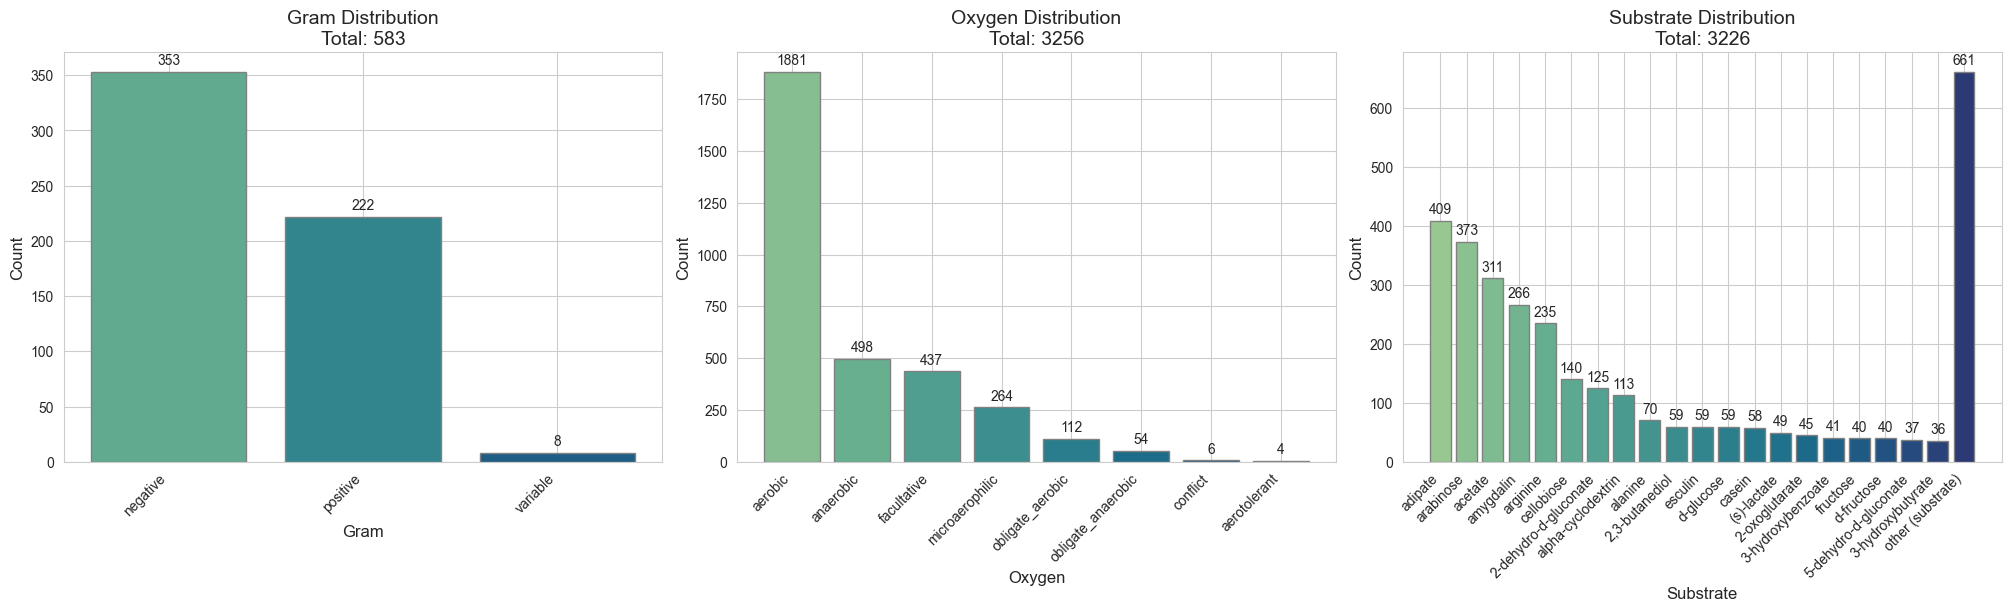

In [3]:
# Utility to group lower-frequency categories into 'other'
def group_top_n_counts(counts, trait, top_n=20):
    if len(counts) > top_n:
        top = counts.nlargest(top_n)
        other_sum = counts.drop(top.index).sum()
        top[f'other ({trait})'] = other_sum
        return top
    else:
        return counts

# Prepare data counts for each trait
grid_traits = [
    ('gram', processor.preprocess_traits(reduced_traits, 'gram').value_counts()),
    ('oxygen', processor.preprocess_traits(reduced_traits, 'oxygen').value_counts()),
    ('substrate', processor.preprocess_traits(reduced_traits, 'substrate').value_counts())
]

# Use Seaborn's whitegrid style and crest palette
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

for i, (ax, (trait, counts)) in enumerate(zip(axes, grid_traits)):
    # Group low-frequency categories
    grouped = group_top_n_counts(counts, trait, top_n=20)
    total = counts.sum()

    # Use crest palette with the right number of categories
    colors = sns.color_palette("crest", n_colors=len(grouped))

    # Plot bars
    bars = ax.bar(grouped.index, grouped.values, color=colors, edgecolor='gray')

    # Titles and labels
    ax.set_title(f"{trait.capitalize()} Distribution\nTotal: {total}", fontsize=14)
    ax.set_xlabel(trait.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Rotate x-axis labels
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    # Annotate bar heights
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f'{int(height)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.show()


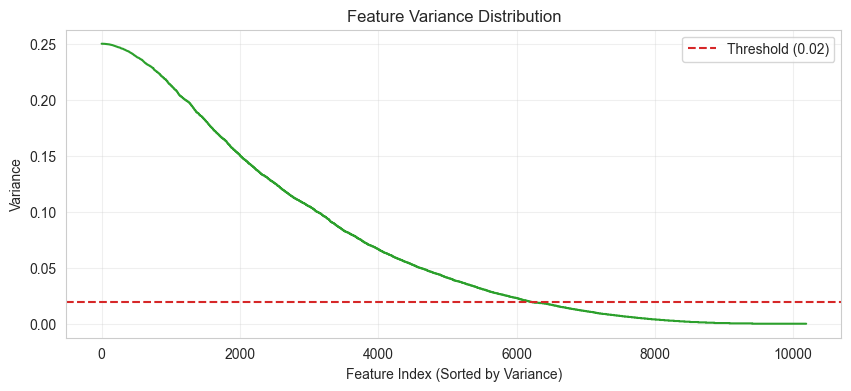

In [4]:
# Compute variance for KO terms  
X_terms = processor.preprocess_terms(ko_terms)  
variances = X_terms.var(axis=0).sort_values(ascending=False)  

# Plot variance across features  
plt.figure(figsize=(10, 4))  
plt.plot(range(len(variances)), variances.values, linestyle='-', color='#2ca02c')  
plt.axhline(y=0.02, color='#d62728', linestyle='--', label='Threshold (0.02)')  
plt.title('Feature Variance Distribution', fontsize=12)  
plt.xlabel('Feature Index (Sorted by Variance)', fontsize=10)  
plt.ylabel('Variance', fontsize=10)  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

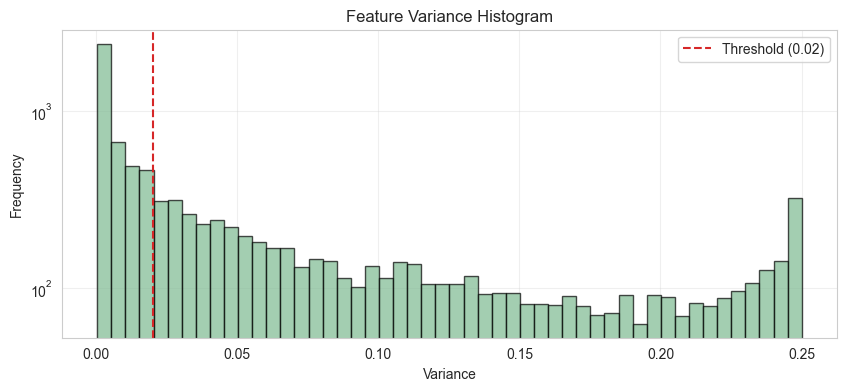

In [5]:
colorSN = sns.color_palette("crest", n_colors=6)[0]  # Use the first color from the crest palette
# Histogram of feature variances  
plt.figure(figsize=(10, 4))
plt.hist(variances, bins=50, color=colorSN, edgecolor='black', alpha=0.7)  
plt.axvline(x=0.02, color='#d62728', linestyle='--', label='Threshold (0.02)')  
plt.title('Feature Variance Histogram', fontsize=12)  
plt.xlabel('Variance', fontsize=10)  
plt.ylabel('Frequency', fontsize=10)  
plt.yscale('log')  # Log scale for skewed distributions  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

Dropped 8 columns with no missing values (except 'key' and 'speciesStrain'): ['speciesStrainComp', 'genus', 'genusComp', 'species', 'speciesComp', 'genomeAccNo', 'usedAccNo', 'ncbiFTP_FAA']


C:\Users\eliah\AppData\Local\Temp\ipykernel_38396\3688426049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pruned_missing.values, y=pruned_missing.index, palette='crest')


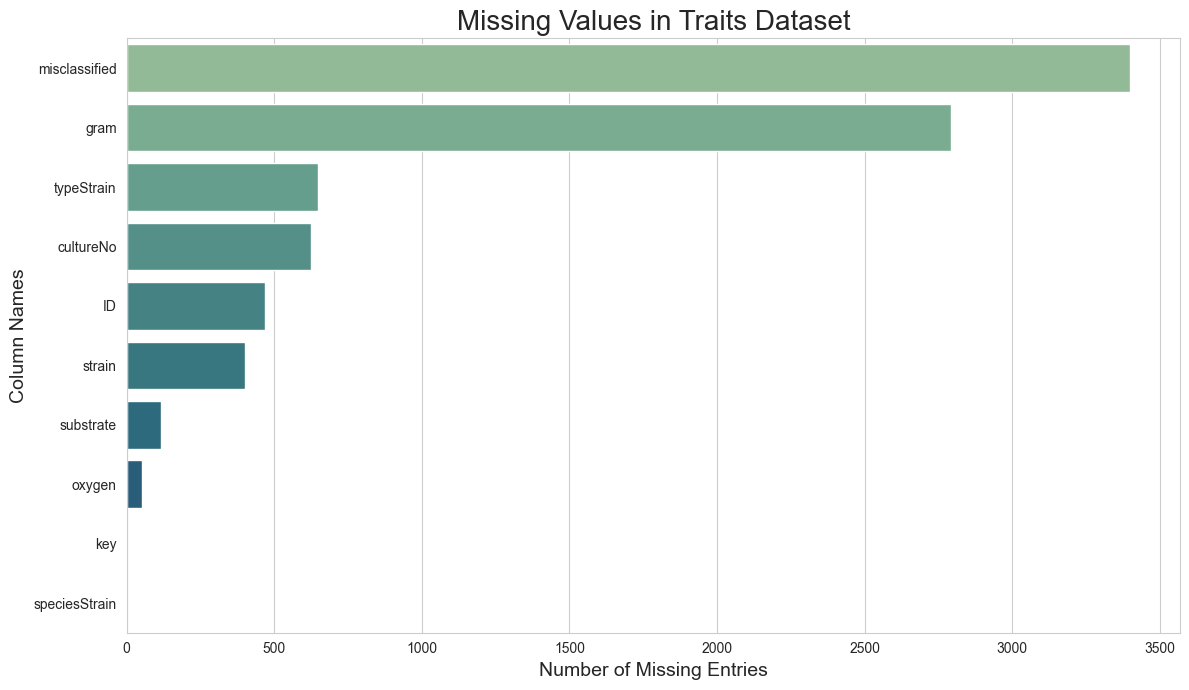

In [6]:
import pandas as pd

# 1. Compute missing counts per column
missing_counts = reduced_traits.isnull().sum()

# 2. Drop columns with no missing values (except 'key' and 'speciesStrain')
cols_to_drop = [
    col for col, n_miss in missing_counts.items()
    if (n_miss == 0 and col not in ['key', 'speciesStrain'])
]
reduced_pruned = reduced_traits.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns with no missing values (except 'key' and 'speciesStrain'): {cols_to_drop}")

# 4. (Optional) Re‑plot the missingness barplot on the pruned DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pruned_missing = reduced_pruned.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=pruned_missing.values, y=pruned_missing.index, palette='crest')
plt.title('Missing Values in Traits Dataset', fontsize=20)
plt.xlabel('Number of Missing Entries', fontsize=14)
plt.ylabel('Column Names', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Compute the correlation matrix
corr_matrix = X_terms.corr(method='pearson')

# Define a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the clustermap
g = sns.clustermap(corr_matrix,
                   method='average',
                   metric='cosine',
                   cmap='crest',  # Use the "crest" color palette
                   center=0,
                   annot=False,  # Disable annotations for simplicity
                   fmt='',  # Critical fix for string annotations
                   figsize=(20, 18),
                   row_cluster=True,
                   col_cluster=True,
                   mask=mask,  # Hide insignificant cells
                   dendrogram_ratio=(0.15, 0.15),
                   cbar_pos=(0.02, 0.8, 0.05, 0.18))

# Access clustering order
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Add cluster boxes
Z = g.dendrogram_row.linkage
clusters = fcluster(Z, t=1.5, criterion='distance')

current_cluster = None
start_idx = 0
for idx, cl in enumerate(clusters[row_order]):
    if cl != current_cluster:
        if current_cluster is not None:
            width = idx - start_idx
            g.ax_heatmap.add_patch(plt.Rectangle(
                (start_idx, start_idx),
                width, width,
                fill=False,
                edgecolor=plt.cm.tab20(cl-1),
                lw=2))
        current_cluster = cl
        start_idx = idx

# Final formatting
# Set tick labels properly
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(),
                            rotation=90,
                            ha='center',
                            fontsize=10)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(),
                            rotation=0,
                            fontsize=10)

# Add main title
g.fig.suptitle('Hierarchically Clustered KO Term Correlations',
              fontsize=16, y=0.95)

# Adjust layout
plt.subplots_adjust(top=0.9)  # Make space for title

# Remove redundant column dendrogram
g.ax_col_dendrogram.set_visible(False)

plt.show()


c:\Users\eliah\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\eliah\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


This visualization reveals critical relationships between microbial gene functions (KEGG Orthology terms) and provides actionable insights into functional modules within your dataset. Here's how to interpret it:

1. Core Components
Heatmap Colors:

Red: Positive correlation (terms co-occur in strains)

Blue: Negative correlation (terms rarely coexist)

White: No correlation

Dendrograms:

Tree structures showing hierarchical relationships between KO terms

Branch lengths = dissimilarity (shorter branches = more similar terms)

Cluster Boxes:

Highlight groups of terms with shared correlation patterns

Color-coded by cluster membership

2. Key Biological Insights
A. Functional Modules
Clustered KO terms (red blocks) likely represent:

Co-regulated operons: Genes in the same metabolic pathway (e.g., K00250 + K00265 = glutamate synthesis)

Phylogenetic markers: Genes conserved in specific microbial clades

Stress response systems: e.g., Heat shock proteins clustered with chaperones

B. Metabolic Strategies
Anti-correlated clusters (blue regions) suggest:

Alternative pathways: e.g., Aerobic vs. anaerobic respiration genes

Niche specialization: Soil vs. marine strains with different nutrient uptake systems

C. Evolutionary Patterns

Short dendrogram branches: Highly conserved genes (e.g., ribosomal proteins)

Long branches: Horizontally transferred genes with variable presence

3. Actionable Observations
Cluster Feature	Biological Meaning	Example KO Terms
Tight red squares	Core pathway components	K00031 (Glycolysis enzymes)
Vertical blue stripes	Strain-specific adaptations	K02025 (ABC transporters)
Small isolated clusters	Rare functional units	K03105 (Antibiotic resistance)
4. Technical Validation
Cluster significance: Use the dendrogram’s distance scale (y-axis) to assess cluster robustness:

Groups with branch heights >1.5 (default cutoff) are statistically meaningful

False positives: Check if anti-correlated terms appear in the same KEGG pathway (may indicate data noise)

5. Limitations & Caveats
Correlation ≠ Causation: Co-occurrence may reflect:

Shared regulatory elements

Phylogenetic inheritance (not direct functional links)

Threshold sensitivity: Clusters depend on the t=1.5 cutoff in fcluster

Variance bias: Top 50 terms may exclude low-variance essential genes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Align data for each trait
traits_to_plot = ['oxygen', 'substrate', 'gram']
aligned_data = {}

for trait in traits_to_plot:
    y_trait = processor.preprocess_traits(
        reduced_traits, trait, use_assembled_if_missing=False
    )
    _, y_aligned = processor.align_data(X_terms, y_trait)
    aligned_data[trait] = y_aligned

def group_small_pie_counts(counts, trait, threshold_pct=1.4):
    total = counts.sum()
    pct   = counts / total * 100
    small = pct < threshold_pct
    other = counts[small].sum()
    counts = counts[~small]
    if other > 0:
        counts[f'other ({trait})'] = other
    return counts

# Plot pie charts
fig, axes = plt.subplots(1, len(traits_to_plot), figsize=(30, 10))

for ax, trait in zip(axes, traits_to_plot):
    counts = pd.Series(aligned_data[trait]).value_counts()
    grouped = group_small_pie_counts(counts, trait)

    # get crest palette with exactly as many colors as categories
    colors = sns.color_palette('crest', n_colors=len(grouped))

    ax.pie(
        grouped.values,
        labels=grouped.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,           # optional: rotate start for consistency
        wedgeprops=dict(edgecolor='w')  # optional: white borders
    )
    ax.set_title(f'{trait.capitalize()} Distribution After Alignment', fontsize=14)

plt.tight_layout()
plt.show()



In [ ]:
plt.figure(figsize=(12,6))
plt.spy(X_terms.sample(1000, random_state=42).values, 
       markersize=0.1, aspect='auto')
plt.title('KO Term Presence/Absence Pattern (1000 Random Samples)')
plt.xlabel('KO Features')
plt.ylabel('Strains')
plt.show()

In [ ]:
stats = pd.DataFrame({
    'Reduced Dataset': [
        reduced_traits.shape[0],
        reduced_traits.shape[1],
        reduced_traits.isnull().sum().sum(),
        reduced_traits.nunique().median()
    ],
    'Processed Features': [
        y_aligned.shape[0],
        y_aligned.shape[0],
        y_aligned.astype(bool).sum().sum(),
        (y_aligned.sum(axis=1) / y_aligned.shape[0]).mean()
    ]}, index=['Samples', 'Features', 'Missing Values', 'Median Unique Values'])

stats.style.background_gradient(cmap='Blues')